<a href="https://colab.research.google.com/github/Lipeya/EMNIST_classify/blob/main/vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Conv1D, MaxPooling2D, MaxPooling1D, Dropout, Flatten
from keras import losses
from keras import optimizers
from keras.utils import np_utils
import numpy as np
import pandas as pd
import csv
import math

#class_array = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']#, 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b','c', 'd', 'e', 'f', 'g', 'h', 'i','j','k','l','m','n','o','p', 'q', 'r','s', 't','u','v','w','x','y','z']
class_array = ['a', 'b','c', 'd', 'e', 'f', 'g', 'h', 'i','j','k','l','m','n','o','p', 'q', 'r','s', 't','u','v','w','x','y','z']
class_dict = {'a':0, 'b':1,'c':2, 'd':3, 'e':4, 'f':5, 'g':6, 'h':7, 'i':8,'j':9,'k':10,'l':11,'m':12,'n':13,'o':14,'p':15, 'q':16, 'r':17,'s':18, 't':19,'u':20,'v':21,'w':22,'x':23,'y':24,'z':25}
class_size =len(class_array)
print(class_size)

26


In [ ]:
import pandas as pd

train_data_list = pd.read_csv("/content/mnt/MyDrive/project/emnist-letters-train.csv") #,chunksize = 100000)
test_data_list = pd.read_csv("/content/mnt/MyDrive/project/emnist-letters-test.csv")
#predict_data_list = pd.read_csv("/content/mnt/MyDrive/project/predict_char.csv")
predict_train = pd.read_csv("/content/mnt/MyDrive/project/encodedpdc.csv")
predict_test = pd.read_csv("/content/mnt/MyDrive/project/encodedpdctest.csv")

In [ ]:
pdc = np.array(predict_train.iloc[:,1:])
pdctest = np.array(predict_test.iloc[:,1:])

In [ ]:
train_data =  np.array(train_data_list.iloc[:,1:])
train_data = train_data.reshape(train_data.shape[0],28,28,1)
train_data_class = np.array(train_data_list.iloc[:,0])
train_data_class = train_data_class - 1
origin_tdc = train_data_class
train_data_class = np_utils.to_categorical(train_data_class ,26)

In [ ]:
test_data =  np.array(test_data_list.iloc[:,1:])
test_data = test_data.reshape(test_data.shape[0],28,28,1)
test_data_class = np.array(test_data_list.iloc[:,0]) -1
origin_test = test_data_class
test_data_class = np_utils.to_categorical(test_data_class, class_size)

print(test_data_class)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
traind = list(train_data)
testd = list(test_data)

In [ ]:
# Resize the images 48*48 as required by VGG16

from keras.preprocessing.image import img_to_array, array_to_img

train_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in train_data])
test_X = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in test_data])
#train_x = preprocess_input(x)
train_X.shape, test_X.shape

((88799, 48, 48, 1), (14799, 48, 48, 1))

In [ ]:
#LSTM X 모델
from tensorflow.keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Conv2D,Conv1D, MaxPooling2D, MaxPooling1D, Dropout, Flatten, Input, concatenate
from keras import losses
from keras import optimizers
from keras.utils import np_utils
import numpy as np
import pandas as pd
import csv
import math


#VGG16
input_layer= Input(shape=(48,48,1))
model_vgg16=VGG16(weights=None,input_tensor=input_layer,include_top=False)
last_layer=model_vgg16.output # we are taking last layer of the model
flatten=Flatten()(last_layer) 


output_layer=Dense(26,activation='softmax')(flatten)


model= Model(inputs=input_layer,outputs=output_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                   

In [ ]:
#LSTM O 모델
from tensorflow.keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Conv2D,Conv1D, MaxPooling2D, MaxPooling1D, Dropout, Flatten, Input, concatenate
from keras import losses
from keras import optimizers
from keras.utils import np_utils
import numpy as np
import pandas as pd
import csv
import math

#다음 문자 예측
char_inputs = Input(shape=(class_size,),dtype='float', name='char_predicts_input')
predict = Dense(52, activation = 'relu')(char_inputs)
predict = Dropout(0.2)(predict)

#VGG16
input_layer= Input(shape=(48,48,1), name = 'img_input')
model_vgg16=VGG16(weights=None,input_tensor=input_layer,include_top=False)
last_layer = model_vgg16.output # we are taking last layer of the model
last_layer = Flatten()(last_layer) 
last_layer = Dropout(0.3)(last_layer)
gap = Dense(52, activation = 'relu')(last_layer)
gap = Dropout(0.2)(gap)

# CNN결과와 다음 문자 예측 결과를 연결
output = concatenate([gap, predict])
output = Dense(52, activation = 'relu')(output)
output = Dropout(0.2)(output)

#Dense로 합산
output = Dense(class_size, activation = 'softmax')(output)


model= Model(inputs=[input_layer,char_inputs] ,outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

We are making all the layers intrainable except the last layer. 



NameError: ignored

In [ ]:
#LSTM X 모델
history = model.fit(train_X,train_data_class,epochs=5,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/5
555/555 [==============================] - 164s 295ms/step - loss: 0.1145 - accuracy: 0.9569 - val_loss: 0.2068 - val_accuracy: 0.9405
Epoch 2/5
555/555 [==============================] - 163s 294ms/step - loss: 0.1067 - accuracy: 0.9593 - val_loss: 0.1942 - val_accuracy: 0.9435
Epoch 3/5
555/555 [==============================] - 163s 294ms/step - loss: 0.1046 - accuracy: 0.9606 - val_loss: 0.2172 - val_accuracy: 0.9382
Epoch 4/5
555/555 [==============================] - 163s 294ms/step - loss: 0.1039 - accuracy: 0.9606 - val_loss: 0.2214 - val_accuracy: 0.9332
Epoch 5/5
555/555 [==============================] - 172s 310ms/step - loss: 0.0938 - accuracy: 0.9640 - val_loss: 0.2160 - val_accuracy: 0.9419


In [ ]:
#LSTM O 모델
history = model.fit([train_X,pdc],train_data_class,epochs=5,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/5
555/555 [==============================] - 164s 296ms/step - loss: 1.7254 - accuracy: 0.5489 - val_loss: 0.3334 - val_accuracy: 0.9138
Epoch 2/5
555/555 [==============================] - 164s 296ms/step - loss: 0.3145 - accuracy: 0.9175 - val_loss: 0.1927 - val_accuracy: 0.9505
Epoch 3/5
555/555 [==============================] - 164s 296ms/step - loss: 0.2041 - accuracy: 0.9460 - val_loss: 0.1728 - val_accuracy: 0.9575
Epoch 4/5
555/555 [==============================] - 164s 296ms/step - loss: 0.1718 - accuracy: 0.9543 - val_loss: 0.1304 - val_accuracy: 0.9672
Epoch 5/5
555/555 [==============================] - 164s 296ms/step - loss: 0.1478 - accuracy: 0.9602 - val_loss: 0.1413 - val_accuracy: 0.9660


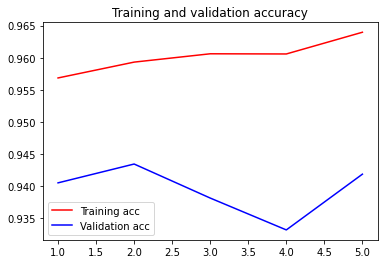

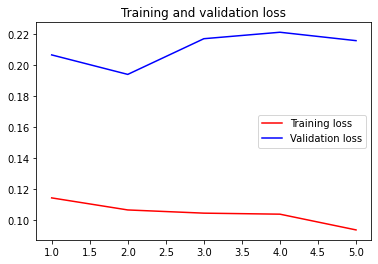

In [ ]:
#LSTM X 모델
import matplotlib.pyplot as plt # plotting
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

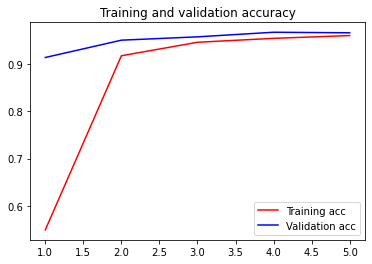

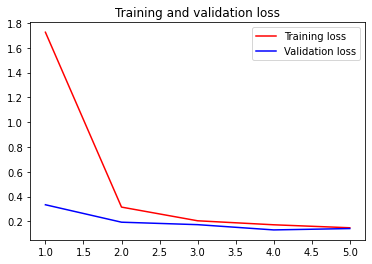

In [ ]:
#LSTM O 모델
import matplotlib.pyplot as plt # plotting
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
#LSTM X 학습 확인
score = model.evaluate(x=test_X,y= test_data_class, verbose=0)
print("loss : " + str(score[0]))
print("accuracy : " + str(score[1]))

loss : 0.24413825571537018
accuracy : 0.927359938621521


In [ ]:
#LSTM O 학습 확인
score = model.evaluate(x=[test_X, pdctest],y= test_data_class, verbose=0)
print("loss : " + str(score[0]))
print("accuracy : " + str(score[1]))

loss : 0.14917485415935516
accuracy : 0.9604703187942505
